In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/Absenteeism_at_work.csv',sep=';')
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [3]:
print(f'Data dimension:{df.shape}')
for col in df.columns:
    print(f'column:{col:35} | type:{str(df[col].dtype):7} \
          | missing values: {df[col].isna().sum():3d}')

Data dimension:(740, 21)
column:ID                                  | type:int64             | missing values:   0
column:Reason for absence                  | type:int64             | missing values:   0
column:Month of absence                    | type:int64             | missing values:   0
column:Day of the week                     | type:int64             | missing values:   0
column:Seasons                             | type:int64             | missing values:   0
column:Transportation expense              | type:int64             | missing values:   0
column:Distance from Residence to Work     | type:int64             | missing values:   0
column:Service time                        | type:int64             | missing values:   0
column:Age                                 | type:int64             | missing values:   0
column:Work load Average/day               | type:float64           | missing values:   0
column:Hit target                          | type:int64             | missi

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


# Here We can see that are many categorical values like month, day, season, disciplinary failure, edu, social drink, and social smoker

In [5]:
month_encoding = {1: "January", 2: "February", 3: "March", \
                  4: "April", 5: "May", 6: "June", 7: "July", \
                    8: "August", 9: "September", 10: "October", \
                    11: "November", 12: "December", 0: "Unknown"}
day_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", \
                5: "Thursday", 6: "Friday"}
sesson_encoding = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
edu_encoding = {1:'high_school',2:'graduate',3:'postgraduate',4:'master_phd'}
yes_no_encoding = {0:'No',1:'Yes'}

In [6]:
preprocessed_data = df.copy()
preprocessed_data['Month of absence'] = preprocessed_data['Month of absence'].apply(lambda x:month_encoding[x])
preprocessed_data['Day of the week'] = preprocessed_data['Day of the week'].apply(lambda x:day_encoding[x])
preprocessed_data['Seasons'] = preprocessed_data['Seasons'].apply(lambda x:sesson_encoding[x])
preprocessed_data['Education'] = preprocessed_data['Education'].apply(lambda x:edu_encoding[x])
preprocessed_data['Social drinker'] = preprocessed_data['Social drinker'].apply(lambda x:yes_no_encoding[x])
preprocessed_data['Social smoker'] = preprocessed_data['Social smoker'].apply(lambda x:yes_no_encoding[x])
preprocessed_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,11,36,3,7,11,3,10,20,14,1
Reason for absence,26,0,23,7,23,23,22,23,19,22
Month of absence,July,July,July,July,July,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday,Friday,Friday,Friday,Monday,Monday
Seasons,Spring,Spring,Spring,Spring,Spring,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289,179,361,260,155,235
Distance from Residence to Work,36,13,51,5,36,51,52,50,12,11
Service time,13,18,18,14,13,18,3,11,14,14
Age,33,50,38,39,33,38,28,36,34,37
Work load Average/day,239.554,239.554,239.554,239.554,239.554,239.554,239.554,239.554,239.554,239.554


# let's see the reasons of absence
# Note there are some diseases not in the ICD table

In [7]:
def in_icd(val):
    return 'Yes' if val >=1 and val <= 21 else 'No'

In [8]:
preprocessed_data['Disease'] = preprocessed_data['Reason for absence'].apply(in_icd)

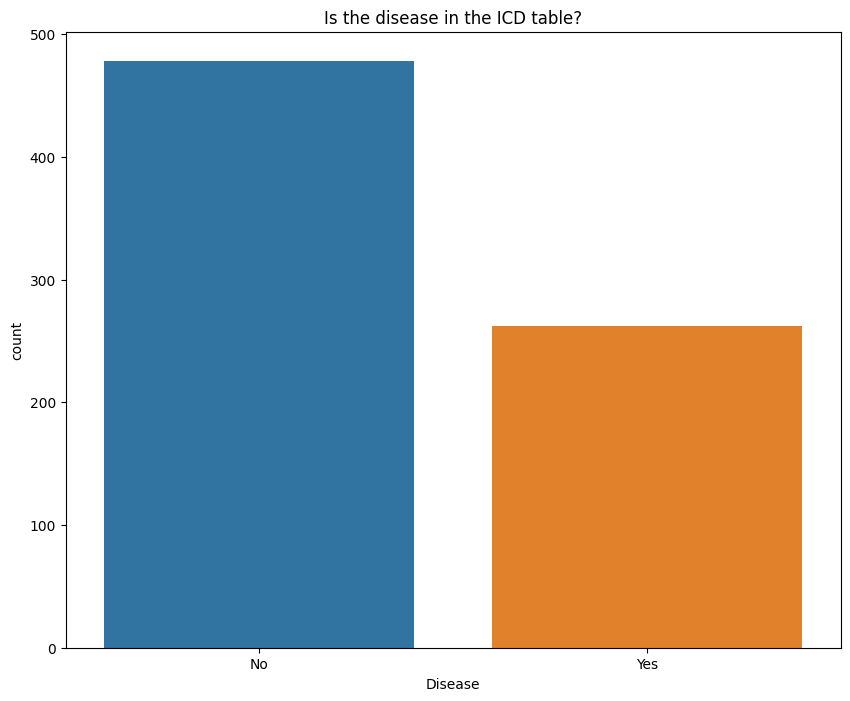

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(data=preprocessed_data,x='Disease')
plt.title('Is the disease in the ICD table?')
plt.savefig('figs/disease_plot.png', format='png', dpi = 300)

## WOW, big difference between the two values, the number of reasons of absence that are not listed in ICD table is almost twice the number of listed ones.

### let's ask some questions:
#### What is the most common reason for absence?
#### Does being drinker or smoker have effect?
#### Does the distance to work have effect?

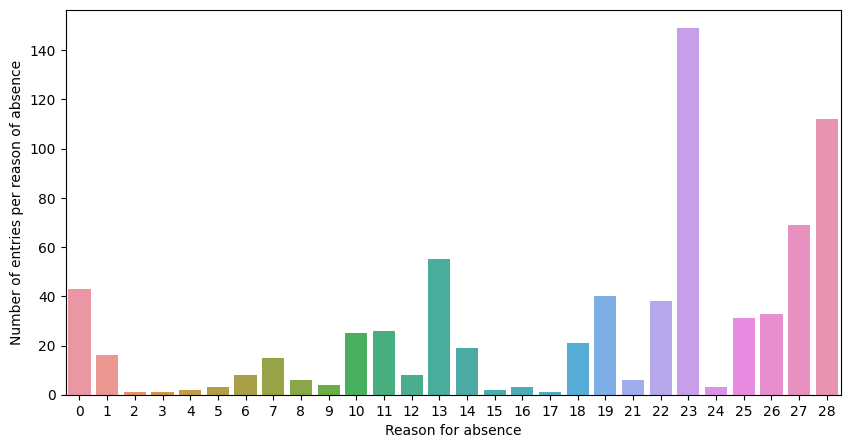

In [10]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=preprocessed_data,x='Reason for absence')
ax.set_ylabel('Number of entries per reason of absence')
plt.savefig('figs/absence_reasons_dist.png',format = 'png', dpi=300)

### the most frequent reasons are related with health problems   

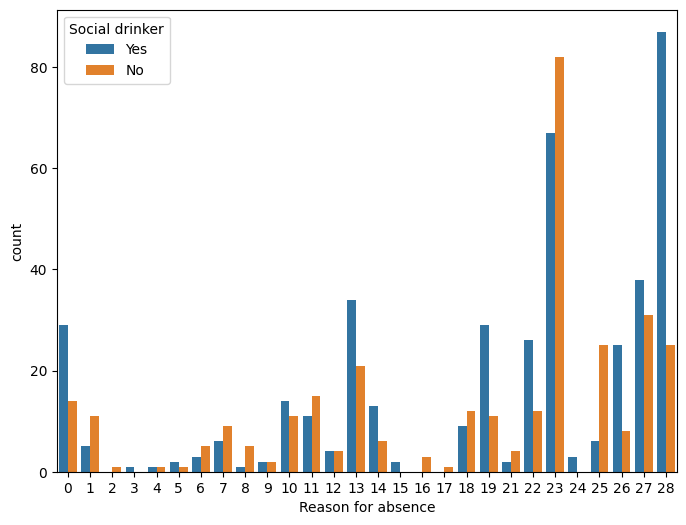

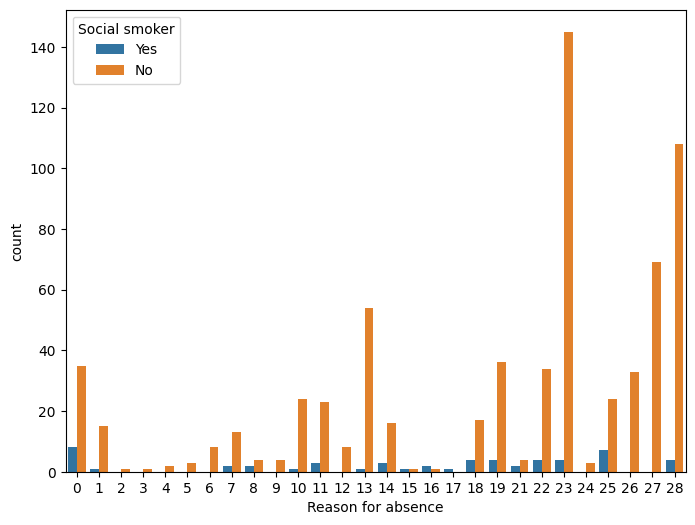

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data=preprocessed_data,x='Reason for absence',hue='Social drinker',hue_order=['Yes','No'])
plt.savefig('figs/absence_reasons_drinker.png',format='png',dpi=300)
plt.figure(figsize=(8,6))
sns.countplot(data=preprocessed_data,x='Reason for absence',hue='Social smoker',hue_order=['Yes','No'])
plt.savefig('figs/absence_reasons_smoker.png',format='png',dpi=300)

In [12]:
#count social drinkers and smokers
print(preprocessed_data['Social drinker'].value_counts(normalize=True))
print(preprocessed_data['Social smoker'].value_counts(normalize=True))


Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


# conditional probability
## What is the probability of a reason for absence being related to laboratory examinations, assuming that an employee is a social drinker?

In [13]:
#exmpale probability of event A conditioned to B
sample_space = set(["BB", "BG", "GB", "GG"])
event_a = set(["BB"])
event_b = set(["BB", "BG", "GB"])
cond_prob = (0.25*len(event_a.intersection(event_b))) / (0.25*len(event_b))
print(round(cond_prob, 4))

0.3333


In [14]:
drinker_prob = preprocessed_data['Social drinker'].value_counts(normalize=True)['Yes']
smoker_prob = preprocessed_data['Social smoker'].value_counts(normalize=True)['Yes']
print(f'P(Social drinkers) = {drinker_prob:.3f} \
      | P(Social smoker) = {smoker_prob:.3f}' )

P(Social drinkers) = 0.568       | P(Social smoker) = 0.073


In [15]:
total_entries = preprocessed_data.shape[0]
drinker_mask = preprocessed_data['Social drinker'] == 'Yes'
smoker_mask = preprocessed_data['Social smoker'] == 'Yes'
absence_drinker_prob = preprocessed_data['Reason for absence'][drinker_mask].value_counts() /  total_entries
absence_smoker_prob = preprocessed_data['Reason for absence'][smoker_mask].value_counts() / total_entries

In [16]:
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob['P(Absence | social drinker)'] = absence_drinker_prob / drinker_prob
cond_prob['P(Absence | social smoker)'] = absence_smoker_prob / smoker_prob

<Figure size 640x480 with 0 Axes>

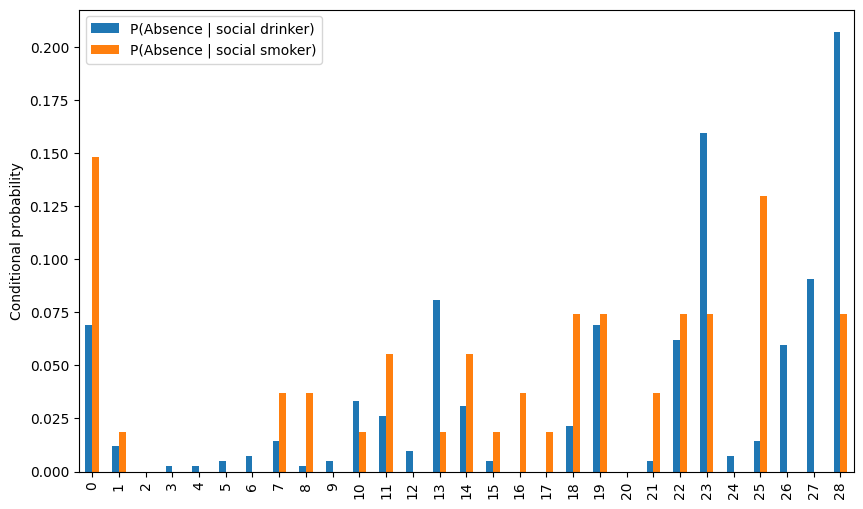

In [17]:
plt.figure()
ax = cond_prob.plot.bar(figsize = (10,6))
ax.set_ylabel('Conditional probability')
plt.savefig('figs/Conditional_probabilities.png',format='png',dpi = 300)